#  ML PROJECT - HEART DISEASE PREDICTION

In this ML Project we are going to predict the risk of Heart Disease in individuals from the data set given to us by our mentor Mr.Pranav Jaipurkar. In this Machine Learning Project we have prepared different models for prediction. This particular code file deals with the K-NN Model Classifier. So, let's get started with the project.

## Importing all the software libraries

In [1]:
#step 1 : Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [22]:
#step 2 : Importing other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [88]:
#step 3 : Importing KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

## Reading dataset


In [122]:
#step 4 : Importing and reading dataset
df = pd.read_csv('heart.csv')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploring the dataset to derive other useful information

In [26]:
df.shape

(303, 14)

This shows that our data has 303 rows and 14 columns.

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

This shows the column headings of our data.

In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statistical Details Describe provides us with statistical information in the numeric format, we can infer that in the AGE column the minimum age is 29yrs,the maximum age is 77yrs and mean age is 54yrs.The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles or 4 equal parts, so 25% values lie in each group. Standard Deviation and mean are statistical measures which give us an idea of the central tendency of the dataset. However, mean is effected by outliers and hence we need more information to make accurate decisions.

In [29]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

This returns the number of unique values for each variable

In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Checking for null Values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This gives us the data type and memory usage value. We can notice here that the dataset has no null values hence saving us from converting the null values into some data or droppping them altogether.

## Feature  Selection

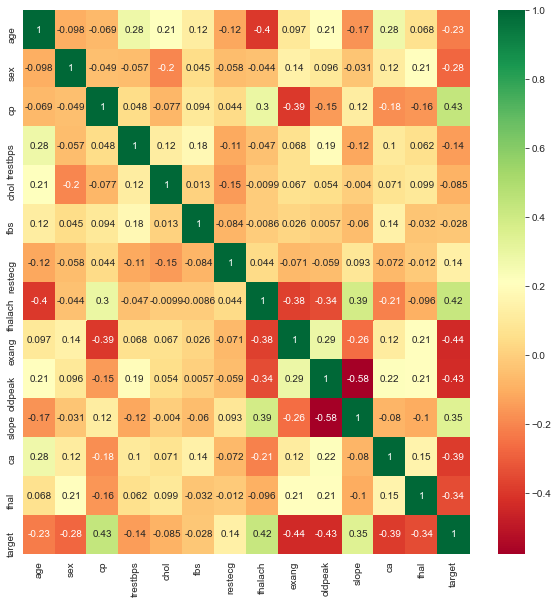

In [74]:
#step 5 : Getting Correlations
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [2]:
import pandas as pd
df = pd.read_csv("heart.csv")
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


We observe positive correlation between target and cp, thalach, slope and negative correlation between target and sex, exang, ca, thal, oldpeak

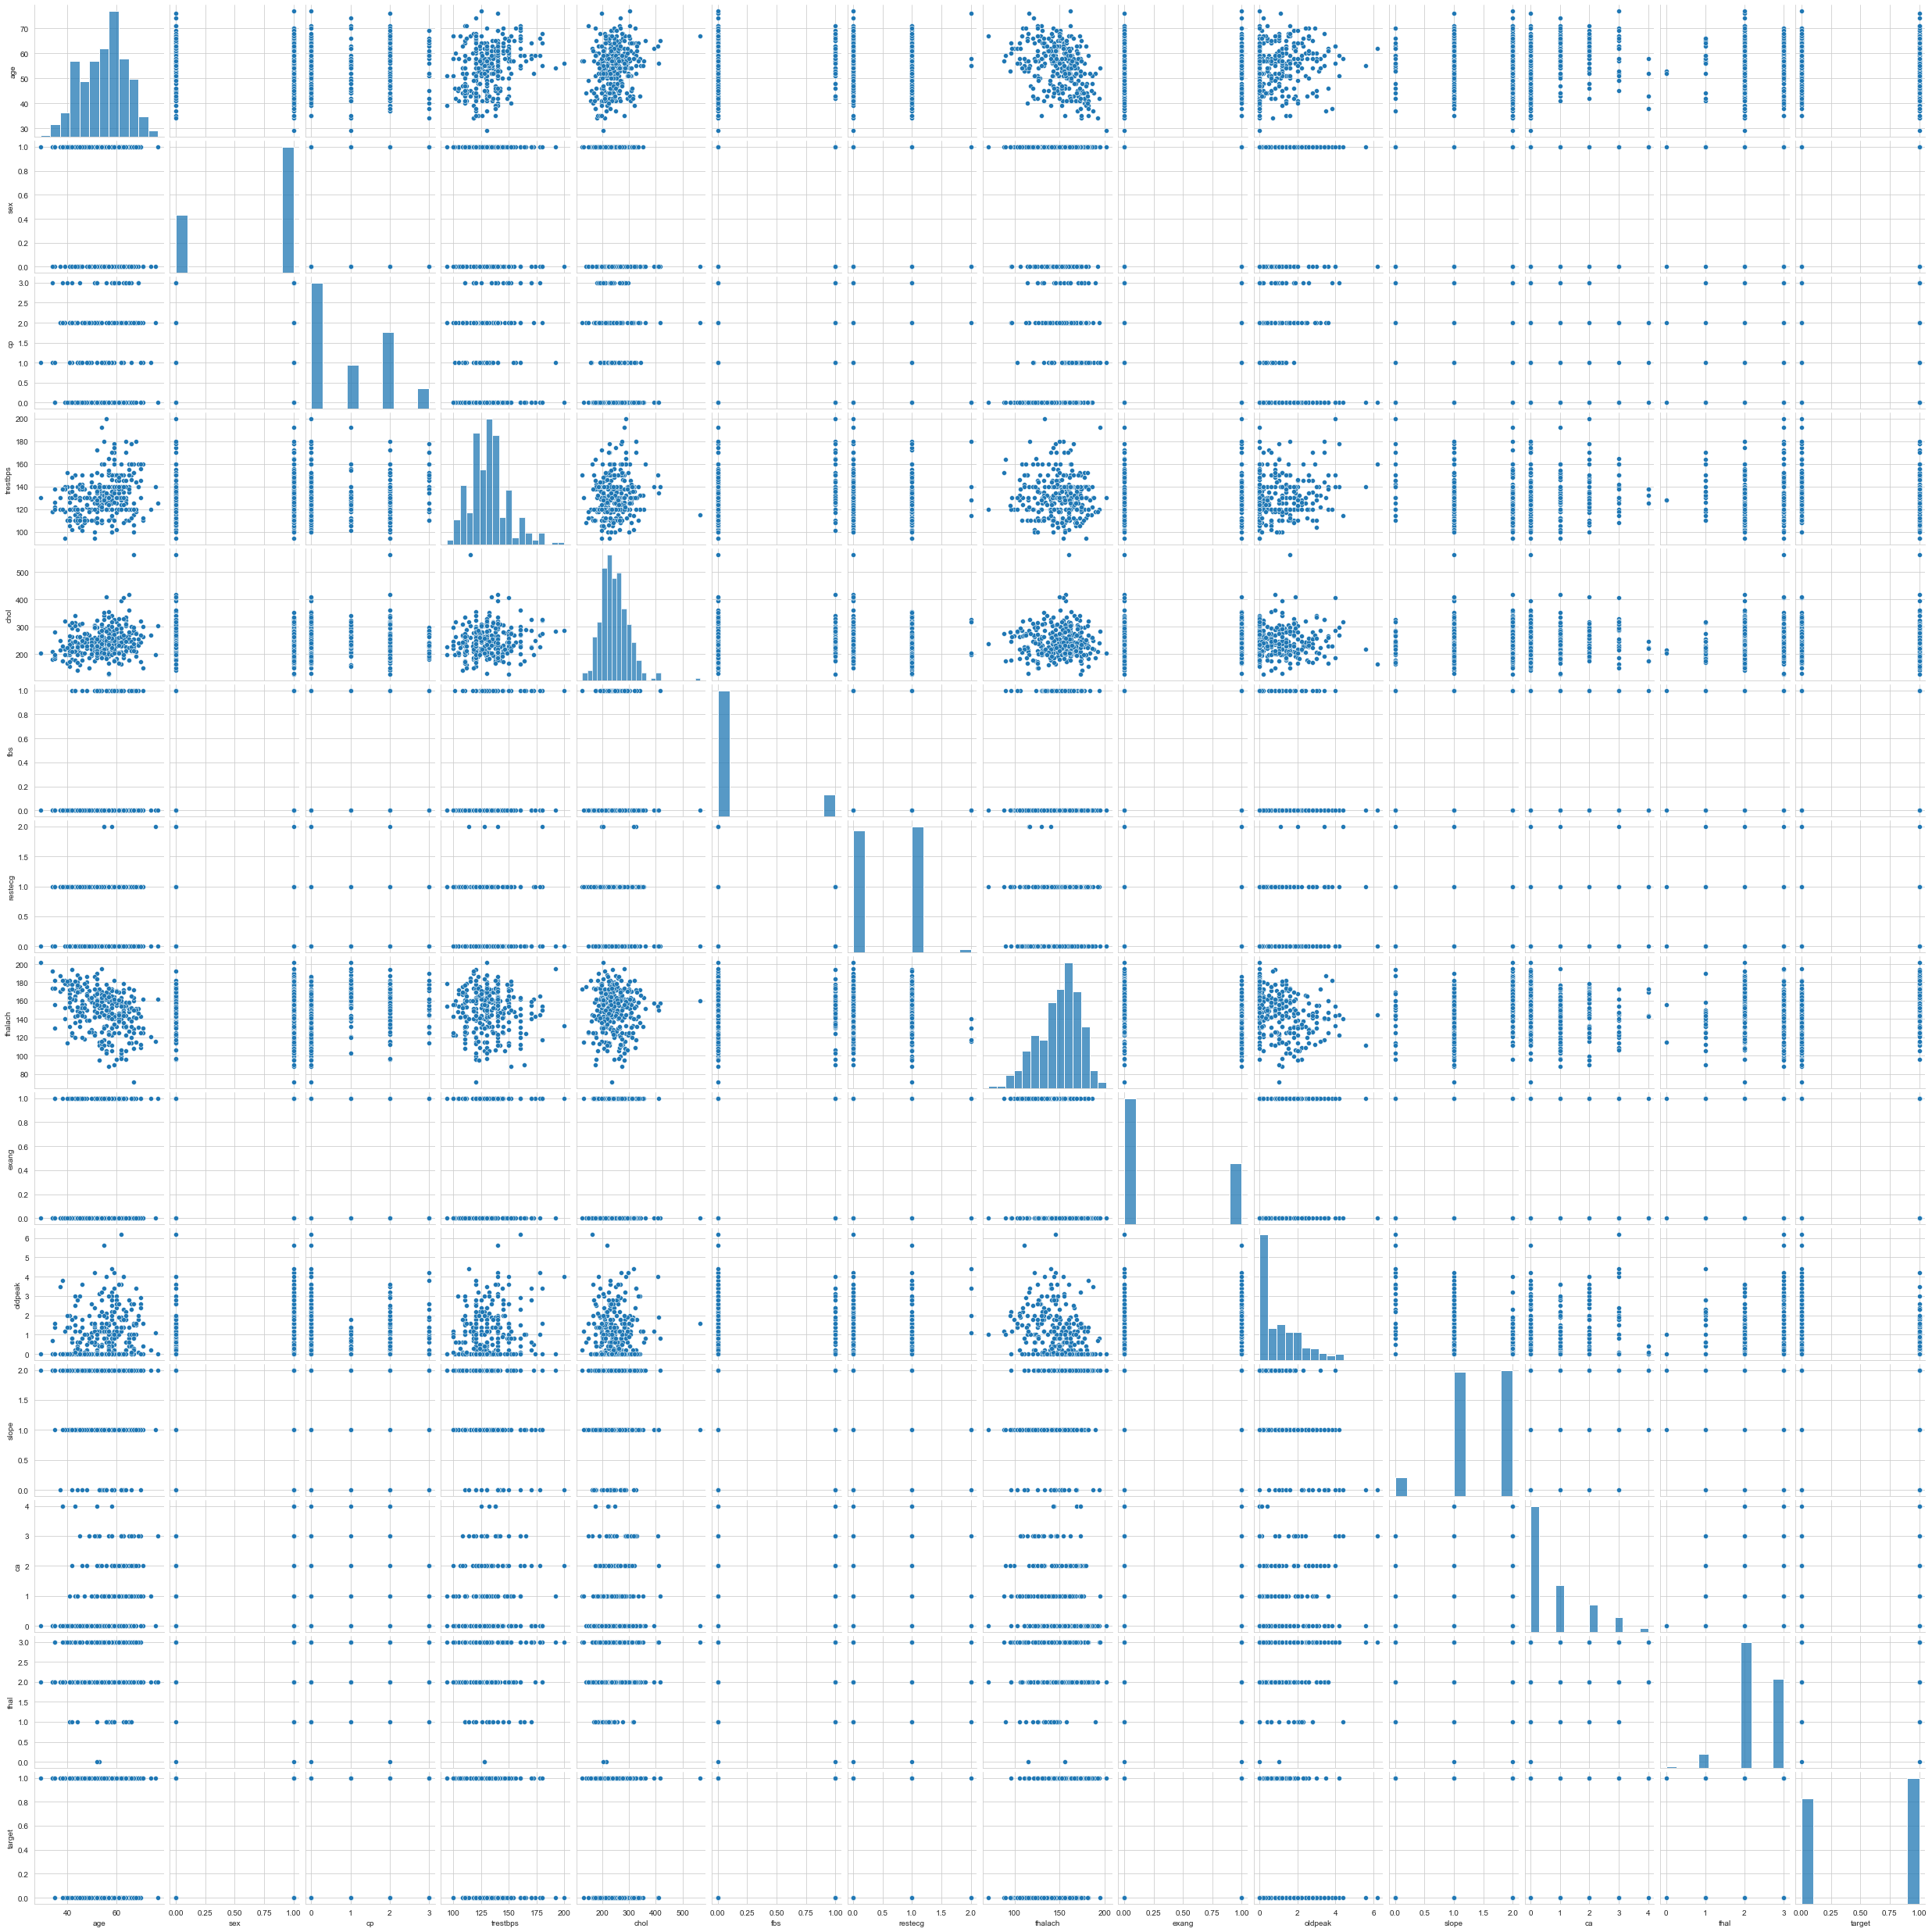

In [33]:
sns.pairplot(data = df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

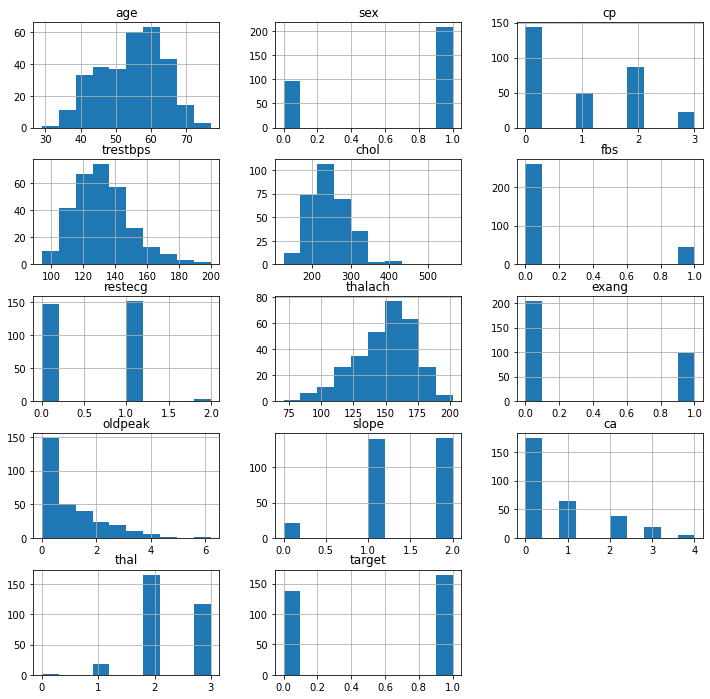

In [9]:
df.hist(figsize=(12,12), layout=(5,3))

## Comparing target classes

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus,let's check for the same.

In [34]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

This gives us the count of patients with a heart disease and without and let's us know if there is a good proportion between our positive and negative binary predictor.

<AxesSubplot:xlabel='target', ylabel='count'>

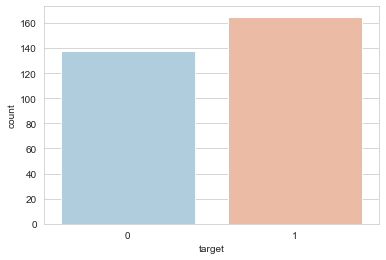

In [10]:
#step 6 : Bar plot for target classes
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

## Data Preprocessing

After exploring the dataset, we can observe that we need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning model. Firstly, we can use the get_dummies method to create dummy columns for categorical variables.

In [11]:
#step 7 : Converting categorical values to dummy variables
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang','slope', 'ca', 'thal'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = StandardScaler.fit_transform(dataset[columns_to_scale])

In [13]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## Getting Accuracy Score and Confusion Matrix

In [50]:
#step 8 : Getting Accuracy Score and Confusion Matrix using train_test_split,classification_report and confusion_matrix
import pandas as pd
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dataset = pd.read_csv("heart.csv",names=names)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [79]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.78      0.83      0.81        35

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61

[[18  8]
 [ 6 29]]



                                   Accuracy = 77%
                                   
 18 is the amount of true positives in our data while 29 is the amount of true negatives.
 8 and 6 are the number of errors
 
 There are 8 Type1 errors,i.e, predicted false positive value and 6 Type2 errors.i.e, predicted false negative values.

## Predicting Target Values

In [ ]:
#step 9 : Prediction of Target Values

In [100]:
knn = KNeighborsClassifier(1)

In [101]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
type(X_train), type(y_train), y_train

(numpy.ndarray,
 numpy.ndarray,
 array([265, 260, 242, 256, 177, 218, 212, 249, 234, 149, 234, 203, 281,
        211, 294, 224, 244, 236, 283, 319, 326, 261, 197, 198, 313, 282,
        298, 327, 177, 270, 207, 237, 230, 275, 193, 284, 197, 187, 243,
        226, 196, 192, 303, 182, 274, 271, 225, 217, 263, 260, 245, 261,
        330, 417, 325, 308, 186, 201, 353, 199, 311, 203, 249, 197, 249,
        126, 247, 211, 164, 268, 222, 149, 229, 204, 244, 213, 215, 341,
        263, 250, 335, 199, 233, 219, 239, 259, 198, 185, 230, 228, 269,
        246, 255, 203, 318, 183, 160, 235, 223, 315, 286, 275, 306, 304,
        262, 322, 218, 220, 204, 200, 201, 283, 199, 231, 204, 195, 407,
        212, 309, 231, 252, 289, 236, 219, 223, 294, 212, 240, 227, 267,
        167, 342, 193, 254, 245, 266, 257, 206, 263, 245, 269, 307, 219,
        254, 273, 248, 226, 239, 254, 188, 225, 315, 309, 243, 283, 221,
        255, 282, 274, 304, 248, 204, 141, 269, 288, 205, 282, 269, 354,
        211, 234, 2

In [106]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
X_test

In [108]:
predict = knn.predict(X_test)

In [109]:
predict

array([244, 206, 226, 261, 183, 197, 236, 294, 261, 204, 232, 243, 244,
       261, 342, 213, 235, 219, 255, 228, 289, 407, 263, 203, 201, 219,
       215, 236, 265, 342, 149, 273, 309, 263, 260, 227, 244, 307, 256,
       232, 303, 234, 299, 269, 295, 174, 231, 309, 183, 299, 243, 226,
       213, 160, 197, 263, 295, 234, 342, 304, 184], dtype=int64)

In [110]:
y_test

array([239, 208, 220, 264, 175, 208, 220, 288, 271, 205, 240, 241, 247,
       258, 330, 216, 243, 222, 253, 234, 288, 394, 268, 212, 197, 204,
       209, 243, 264, 340, 131, 289, 299, 267, 250, 228, 233, 302, 256,
       232, 302, 240, 298, 265, 282, 166, 234, 303, 175, 293, 246, 235,
       214, 169, 188, 246, 295, 233, 335, 300, 178], dtype=int64)

In [111]:
score = knn.score(X_test, y_test)

In [112]:
score

0.04918032786885246

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
predict, y_test

(array([244, 206, 226, 261, 183, 197, 236, 294, 261, 204, 232, 243, 244,
        261, 342, 213, 235, 219, 255, 228, 289, 407, 263, 203, 201, 219,
        215, 236, 265, 342, 149, 273, 309, 263, 260, 227, 244, 307, 256,
        232, 303, 234, 299, 269, 295, 174, 231, 309, 183, 299, 243, 226,
        213, 160, 197, 263, 295, 234, 342, 304, 184], dtype=int64),
 array([239, 208, 220, 264, 175, 208, 220, 288, 271, 205, 240, 241, 247,
        258, 330, 216, 243, 222, 253, 234, 288, 394, 268, 212, 197, 204,
        209, 243, 264, 340, 131, 289, 299, 267, 250, 228, 233, 302, 256,
        232, 302, 240, 298, 265, 282, 166, 234, 303, 175, 293, 246, 235,
        214, 169, 188, 246, 295, 233, 335, 300, 178], dtype=int64))

In [115]:
confusion_matrix(y_test, predict)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [116]:
predict = knn.predict(X_train)

In [117]:
predict

array([265, 260, 242, 256, 177, 218, 212, 249, 234, 149, 234, 203, 281,
       211, 294, 224, 244, 236, 283, 319, 326, 261, 197, 198, 313, 282,
       298, 327, 177, 270, 207, 237, 230, 275, 193, 284, 197, 187, 243,
       226, 196, 192, 303, 182, 274, 271, 225, 217, 263, 260, 245, 261,
       330, 417, 325, 308, 186, 201, 353, 199, 311, 203, 249, 197, 249,
       126, 247, 211, 164, 268, 222, 149, 229, 204, 244, 213, 215, 341,
       263, 250, 335, 199, 233, 219, 239, 259, 198, 185, 230, 228, 269,
       246, 255, 203, 318, 183, 160, 235, 223, 315, 286, 275, 306, 304,
       262, 322, 218, 220, 204, 200, 201, 283, 199, 231, 204, 195, 407,
       212, 309, 231, 252, 289, 236, 219, 223, 294, 212, 240, 227, 267,
       167, 342, 193, 254, 245, 266, 257, 206, 263, 245, 269, 307, 219,
       254, 273, 248, 226, 239, 254, 188, 225, 315, 309, 243, 283, 221,
       255, 282, 274, 304, 248, 204, 141, 269, 288, 205, 282, 269, 354,
       211, 234, 258, 177, 234, 254, 309, 157, 277, 273, 254, 18

In [118]:
confusion_matrix(y_train, predict)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [119]:
# Model Accuracy: how often is the classifier correct?
knn.score(X_train, y_train)

1.0

## Training the K-NN model

In [54]:
#step 10 : Training the model
import sklearn
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

In [57]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
dataset = neighbors.KNeighborsClassifier(n_neighbors = 17)
dataset.fit(X_train, y_train)

In [ ]:
accuracy = dataset.score(X_train, y_train)
print("Accuracy",accuracy)

Accuracy 0.7641509433962265

## K-NN Model

In [35]:
#step 11 : Plotting the K-NN Model
from sklearn import preprocessing
import pandas as pd

df = pd.read_csv("heart.csv")

label_encoder = preprocessing.LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df['age'].unique()

array([29,  3,  7, 22, 23, 10, 18, 20, 14, 15, 30, 24, 16, 32,  9, 35, 25,
        8, 27,  6, 37, 17, 31, 19, 12, 11,  5, 13, 28,  1,  2,  0, 21, 26,
       33, 34, 38, 39, 36,  4, 40], dtype=int64)

In [14]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [15]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

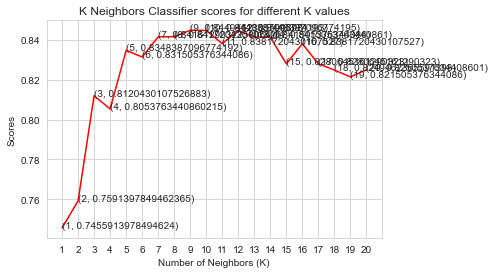

In [17]:
plt.plot([k for k in range(1,21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
knn_scores.append(score.mean())

In [94]:
knn_scores

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

In [95]:
score.mean()

0.8250537634408601

## Bar plot between Males and Females having heart disease.

In [70]:
#step 12 : Plotting a bar graph between the number of males and females having heart disease
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

df= pd.read_csv("heart.csv")
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


sex : 0=females; 1= males

24 females and 114 males don't have heart disease while 72 females and 93 males have heart disease.

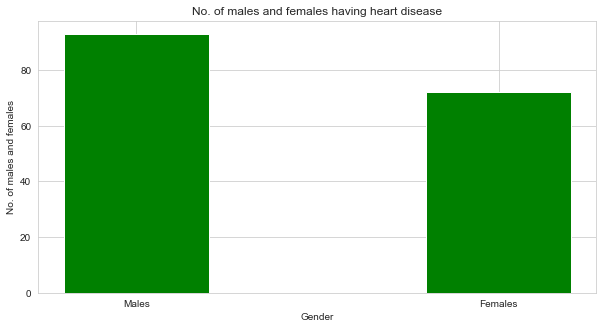

In [71]:
import numpy as np
import matplotlib.pyplot as plot

data = {'Males': 93, 'Females': 72}
Gender = list(data.keys())
HeartDisease = list(data.values())
    
fig = plt.figure(figsize = (10,5))

plt.bar(Gender, HeartDisease, color = 'green', width = 0.4)
plt.xlabel("Gender")
plt.ylabel("No. of males and females")
plt.title("No. of males and females having heart disease")
plt.show()

## Scatter plot between Age and Maximum heart rate.

In [72]:
#step 13 : Plotting a scatter plot between age and Maximum Heart rate.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

df= pd.read_csv("heart.csv")
age = pd.crosstab(df['age'], df['target'])
print(age)

target   0   1
age           
29       0   1
34       0   2
35       2   2
37       0   2
38       1   2
39       1   3
40       2   1
41       1   9
42       1   7
43       3   5
44       3   8
45       2   6
46       3   4
47       2   3
48       3   4
49       2   3
50       3   4
51       3   9
52       4   9
53       2   6
54       6  10
55       5   3
56       6   5
57      10   7
58      12   7
59       9   5
60       8   3
61       7   1
62       7   4
63       6   3
64       4   6
65       4   4
66       3   4
67       6   3
68       2   2
69       1   2
70       3   1
71       0   3
74       0   1
76       0   1
77       1   0


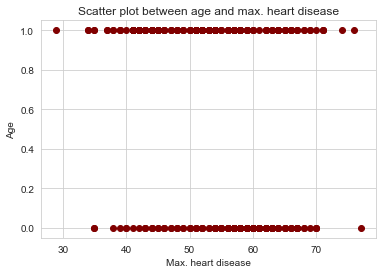

In [73]:
# No. of males and females having a heart disease according to age.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")
plt.scatter(df['age'], df['target'], color = 'Maroon')
plt.xlabel("Max. heart disease")
plt.ylabel("Age")
plt.title("Scatter plot between age and max. heart disease")
plt.show()

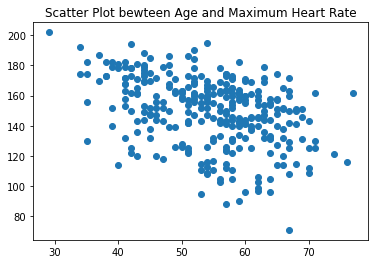

In [13]:
# Total no. of patients of both the sexes having a heart disease.
import matplotlib.pyplot as plt 
import pandas as pd
df = pd.read_csv("heart.csv")
plt.scatter(df['age'],df['thalach'])
plt.title('Scatter Plot bewteen Age and Maximum Heart Rate')
plt.show()

We have plotted the various data scores using the K-NN Classifier and have also calculated the mean score from the derived data points of the K-NN plot. The mean score from the K-NN graph is 82.50%. We've also plotted bar graph between the number of males and females prone to heart disease and a scatter plot between Age and Maximum Heart rate.We can also infer from the K-NN program code that K-NN doesn’t work well with large datasets and does not work well with big dimensional data because it is hard to calculate the distance between each data point which is the drawback of the algorithm.

With this we have completed the K-NN Model.

# Thankyou!